In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from scipy.stats import *
import random

# Statistical tests

## Task 20 T-test
The mean life expectancy of men in the overall population is known to be µ0 = 75 years. We have a sample of men with life expectancies of 56, 81, 72, 65, 67, 62 and 70 years. Test H0 hypothesis: the average life expectancy of men in the sample equals the population average, µ0 = µ1.

In [2]:
sample = [56, 81, 72, 65, 67, 62, 70]
µ0 = 75.1
n = len(sample)

# sample mean and unbiased sample standard deviation
x_bar = sum(sample) / n
s = sqrt(sum([(x - x_bar)**2 for x in sample]) / (n-1))

# t-test and p-value for a two-tailed test
ts = float((x_bar - µ0) / (s / sqrt(n)))
p_value = 2 * t.cdf(ts, df=n-1)

print (f'If a = 5%, Ho should be rejected, because p_value = {p_value:.2}\n'
       f'Mean life expectancy of men in the sample \n'
       f'is statistically significantly different from the general mean')

If a = 5%, Ho should be rejected, because p_value = 0.046
Mean life expectancy of men in the sample 
is statistically significantly different from the general mean


## Task 21 T-test
After analyzing a sample of size n = 35, the average weight of products produced at the factory was determined to be µ1 = 144 g. The standard weight of parts is µ0 = 135 g. The sample has a standard deviation of σ = 50 g. The objective is to test the null hypothesis that the means are equal: µ0 = µ1.

In [3]:
µ0 = 135
x_bar, n, s = 144, 35, 50

# t-test and p-value for a two-tailed test 
ts = float((x_bar - µ0) / (s / sqrt(n)))
p_value = 2 * t.cdf(ts, df=n-1)

print (f'If a = 5%, Ho cannot be rejected, because p_value = {p_value:.2}\n'
      f'Result: the value of {x_bar} is an admissible norm for the state standard.')

If a = 5%, Ho cannot be rejected, because p_value = 1.7
Result: the value of 144 is an admissible norm for the state standard.


## Task 22 Confidence interval
According to statistics, in a certain city in 100 catering establishments, the average number of employees is 12.4 with a standard deviation of 4.8. Determine the confidence interval of 95% of the number of catering workers.

In [4]:
n, x_bar, s = 100, 12.4, 4.8
alfa = 0.05

# percent point function (inverse of cdf)
t_crit = t.ppf (1-alfa/2, n-1)

lower = x_bar-t_crit*s/sqrt(n)
upper = x_bar+t_crit*s/sqrt(n)

print (f'The 95% confidence interval is between {lower:.3} '
       f'and {upper:.4}')

The 95% confidence interval is between 11.4 and 13.35


## Task 23 Confidence interval
For a random sample of 54 observations, the following quantities are known:
- Sum of values in observations is $450$
- Sum of squared deviation of values from the mean is $2600$

Determinr the 95% confidence interval for the expected value

In [5]:
n = 54
s = sqrt(2600 / (n-1))
x_bar = 450/n
alfa = 0.05

# percent point function (inverse of cdf)
t_crit = t.ppf (1-alfa/2, n-1)

lower = x_bar-t_crit*s/sqrt(n)
upper = x_bar+t_crit*s/sqrt(n)

print (f'The 95% confidence interval is between {lower.n():.3} '
       f'and {upper.n():.4}')

The 95% confidence interval is between 6.42 and 10.25


## Task 24 Mann-Whitney test
Two random variables X and Y are not normally distributed. The null hypothesis of equality of means, µx = µy, is to be tested using the nonparametric Mann-Whitney test.
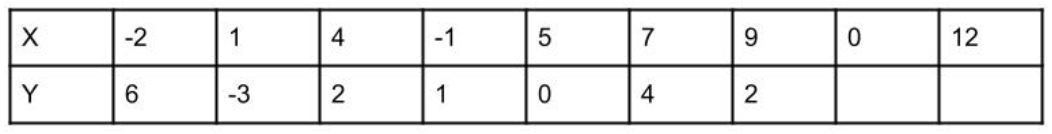

In [6]:
X = (-2,1,4,-1,5,7,9,0,12)
Y = (6,-3,2,1,0,4,2)
Xn = len(X)
Yn = len(Y)

U_crit_param = ('two-tailed, n=9, m=7, alfa = 0.05')
U_crit = 12

ranks = rankdata (X+Y)
ranks_x, ranks_y = ranks[:Xn], ranks[Xn : Xn+Yn]
Rx, Ry  = sum(ranks_x), sum(ranks_y)

U1 = Xn*Yn + Xn*(Xn+1)/2 - Rx
U2 = Xn*Yn + Yn*(Yn+1)/2 - Ry

print (f'U-test for two samples makes {min(U1,U2)}\n'
       f'For given parameters: {U_crit_param} \n'
       f'the threshold U-value is {U_crit}.\n'
       f'Since {min(U1,U2)} > {U_crit}, H0 is to be accepted')

U-test for two samples makes 24.5
For given parameters: two-tailed, n=9, m=7, alfa = 0.05 
the threshold U-value is 12.
Since 24.5 > 12, H0 is to be accepted
